# Imports

In [1]:
import numpy as np
from Ising_Model_Fast import *

# Simulation

## Configuration

### Warm-Up

First call to the function to compile it

In [3]:
seed = 42

N = 10
J1, J2 = 0.5, 1.0
T = 1.0
MC_steps = 1000
save_images = False
images_spacing = np.array([0, 1])
mag_spacing = np.linspace(0, MC_steps, 10)

warm_up_config = {
    'N' : N,
    'J1' : J1,
    'J2' : J2,
    'T' : T,
    'seed' : seed,
    'MC_steps' : MC_steps,
    'save_images' : save_images,
    'images_spacing' : images_spacing,
    'verbose' : 0,
    # 'mag_spacing' : mag_spacing,
}
warm_up_lattice = initialize_lattice(N, seed=seed)
warm_up_energy = get_energy(warm_up_lattice, **warm_up_config)
_, _, _, _ = metropolis(lattice=warm_up_lattice, energy=warm_up_energy, **warm_up_config)
_, _, _, _ = metropolis_large(lattice=warm_up_lattice, energy=warm_up_energy, **warm_up_config)

### Set Parameters

In [8]:
seed = 42

N, T = 100, 0.5
J1, J2 = 0.5, 1.0
MC_steps = int(1e7)

save_images = True
n_imgs = 100
images_spacing = np.unique(np.logspace(0, np.log10(MC_steps), n_imgs, endpoint=True, dtype=int))


params_mod = {
    'N' : N,
    'J1' : J1,
    'J2' : J2,
    'T' : T,
    'seed' : seed,
    'MC_steps' : MC_steps,
    'save_images' : save_images,
    'images_spacing' : images_spacing,
    'verbose' : 0
}
# 
params_cls = params_mod.copy()
params_cls['J1'] = 1.0
params_cls['J2'] = 0.0

params_test = params_mod.copy()
MC_steps_test = MC_steps//N**2
img_spacing_test = np.unique(np.logspace(0, np.log10(MC_steps_test), n_imgs, endpoint=True, dtype=int))
params_test['MC_steps'] = MC_steps//N**2
params_test['images_spacing'] = img_spacing_test

## Initialize net

In [9]:
# Generate a random 2D lattice
lattice = initialize_lattice(N, p=0.5, seed=seed)

# Get initial energy of the lattice
energy = get_energy(lattice, N, J1, J2)

## Simulation

In [ ]:
# Run the Metropolis algorithm
# mags_cls, energies_cls, images_cls, last_conf_cls = metropolis(lattice=lattice, energy=energy, **params_cls)

In [6]:
mags_mod, energies_mod, images_mod, last_conf_mod = metropolis(lattice=lattice, energy=energy, **params_mod)

In [10]:
mags_mod_large, energies_mod_large, images_mod_large, last_conf_mod_large = metropolis_large(lattice=lattice, energy=energy, **params_test)

## Visualize results

In [13]:
paths = path_configuration(N, T)

# Save gif
create_gif(images_mod_large, save_dir=paths['figures'], filename='ising_test.gif', scale=5, fps=15, cmap='plasma')

# Save data
# save_magnetization_data(mags_cls, save_dir=paths['data'], filename='magnetization_cls.npy')
# save_energy_data(energies_cls, save_dir=paths['data'], filename='energy_cls.npy')
fast_save_data(last_conf_mod_large, save_dir=paths['data'], filename='lattice_mod_test')

# Save gif
create_gif(images_mod, save_dir=paths['figures'], filename='ising_mod.gif', scale=5, fps=15, cmap='plasma')

# Save data
# save_magnetization_data(mags_mod, save_dir=paths['data'], filename='magnetization_mod.npy')
# save_energy_data(energies_mod, save_dir=paths['data'], filename='energy_mod.npy')
fast_save_data(last_conf_mod, save_dir=paths['data'], filename='lattice_mod')

GIF saved as Simulations\Simulation_N100_T0.5\figures\ising_test.gif
GIF saved as Simulations\Simulation_N100_T0.5\figures\ising_mod.gif


Text(0, 0.5, 'Magnetization')

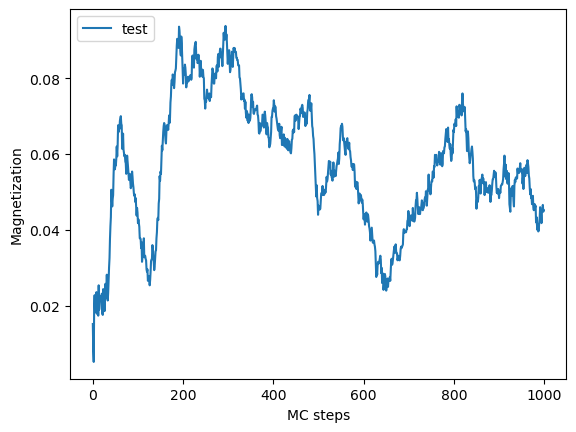

In [15]:
plt.plot(mags_mod_large, label='test')
# plt.plot(mags_mod, label='mod')
plt.legend(loc='upper left')
plt.xlabel('MC steps')
plt.ylabel('Magnetization')

In [50]:
# Bs = np.arange(0.1, 2, 0.05)

# temperatures = 1 / Bs
# T_steps = len(temperatures)

# simulation_params['save_images'] = False

# spins_T = np.empty((T_steps, MC_steps), dtype=np.int8)
# energies_T = np.empty((T_steps, MC_steps), dtype=np.float32)
# images_T = np.empty((T_steps, n_images-2, N, N), dtype=np.int8)

# for i, T in enumerate(temperatures):
#     print(f"Running T = {T:.2f}...")
#     print("-" * 20)
#     simulation_params['T'] = T
#     spins_T[i], energies_T[i], _ = metropolis(**simulation_params)
